# Uber Data Analysis Project

1. Loading and inspecting the dataset 
2. Handling missing values 
3. Summary statistics
4. Data distribution 
5. Correlation analysis 
6. Data visulaization 
7. Time-series analysis(if applicable)

In [18]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno 
from datetime import datetime 

In [11]:
# Load the dataset
df = pd.read_csv(r'uber_data.csv')

In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [13]:
df.info

<bound method DataFrame.info of        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1             1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2             2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3             2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4             2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   
...         ...                  ...                   ...              ...   
99995         1  2016-03-01 06:17:10   2016-03-01 06:22:15                1   
99996         1  2016-03-01 06:17:10   2016-03-01 06:32:41                1   
99997         1  2016-03-01 06:17:10   2016-03-01 06:37:23                1   
99998         2  2016-03-01 06:17:10   2016-03-01 06:22:09                1   
99999         1  2016-03-01 06:17:11   2016-03-01 06:22:00                1   

       trip_distanc

In [14]:
# check for the missing value from bthe datset 
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


Text(0.5, 1.0, 'Missing Data Matrix')

<Figure size 1000x600 with 0 Axes>

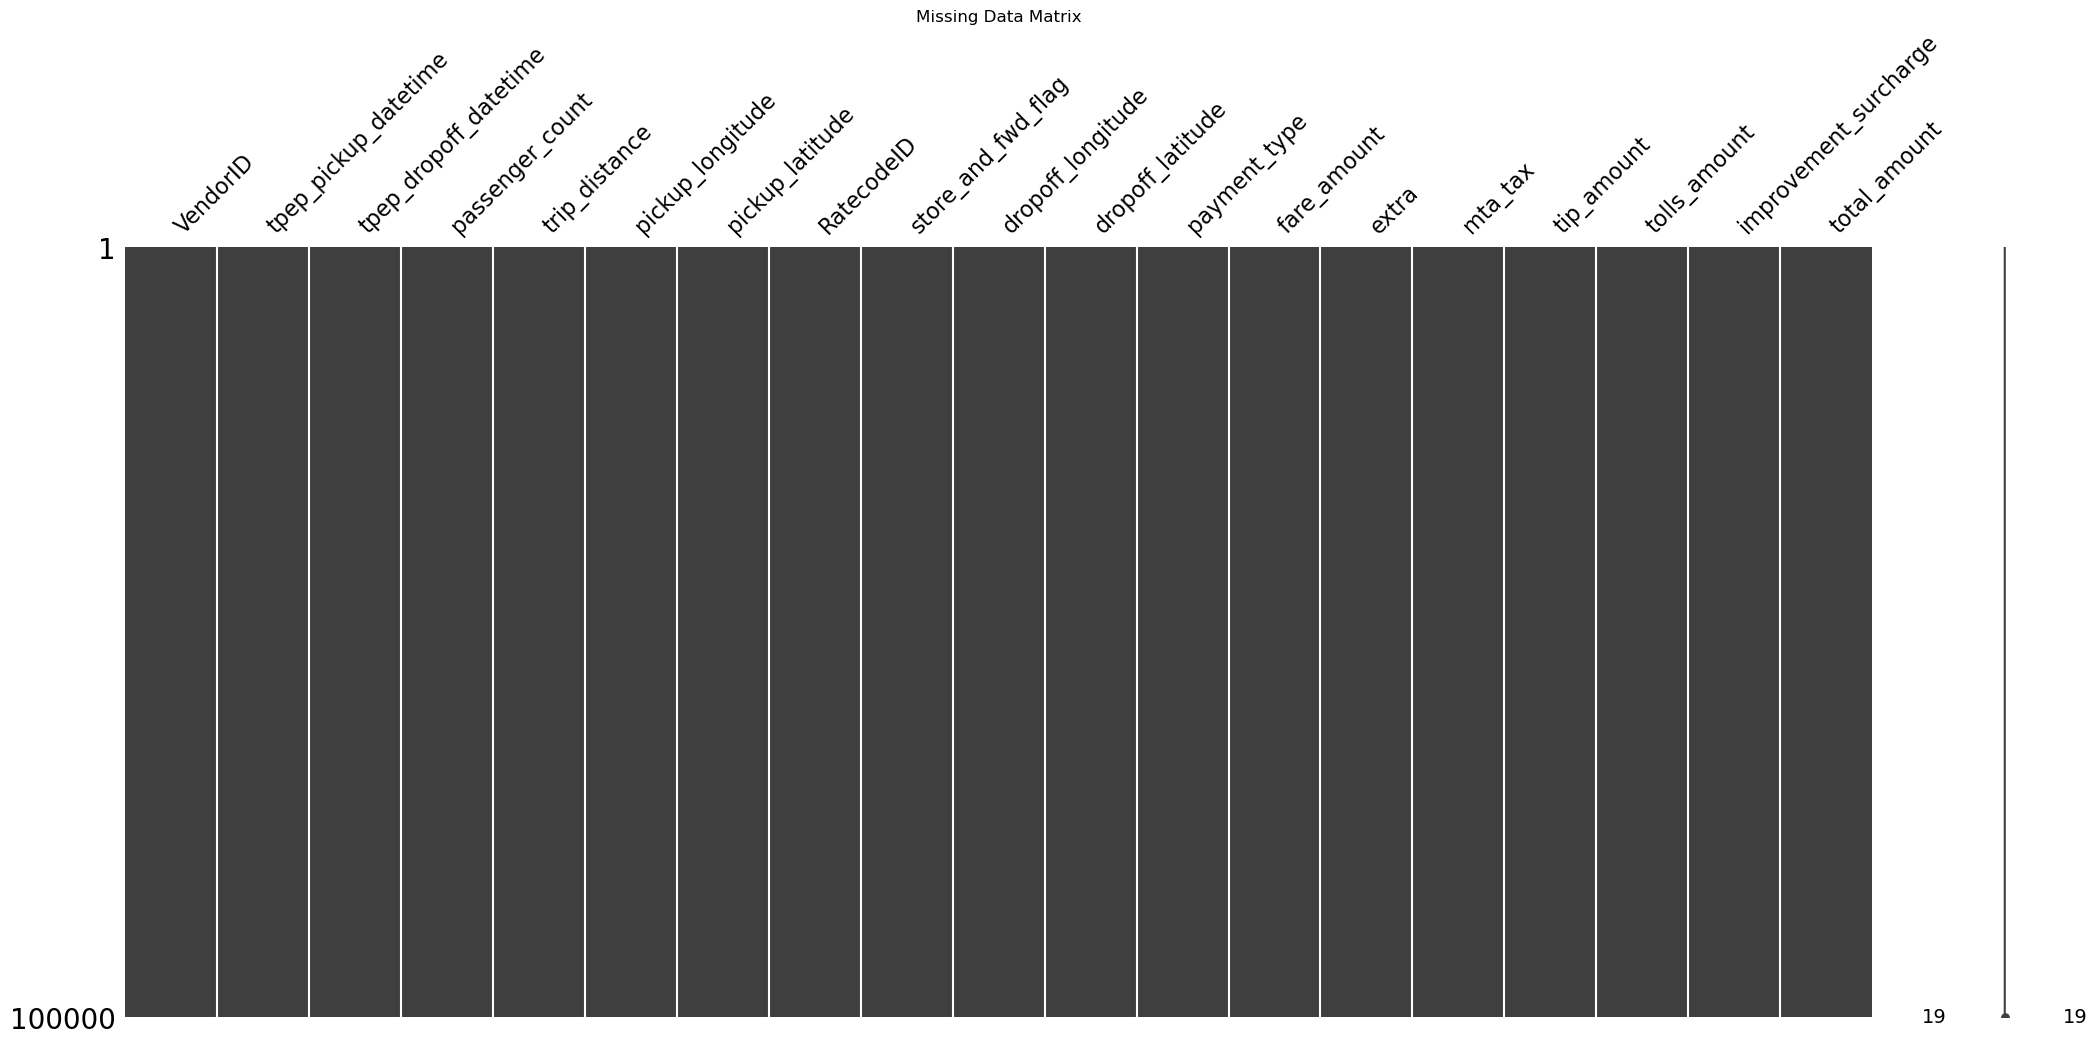

In [19]:
# Visulaizing missing values in the dataset 
plt.figure(figsize=(10 , 6))
msno.matrix(df)
plt.title("Missing Data Matrix")

In [21]:
# Check basic statistics for categorical columns
categorical_cols  = df.select_dtypes(include=['object']).columns
print("\nSummary for Categorical Columns")
print(df[categorical_cols].describe())



Summary for Categorical Columns
       tpep_pickup_datetime tpep_dropoff_datetime store_and_fwd_flag
count                100000                100000             100000
unique                38332                 39981                  2
top     2016-03-10 09:35:06   2016-03-11 00:00:00                  N
freq                     14                    18              99876


In [22]:
# Check for duplicated rows 
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 0


In [23]:
df.drop_duplicates(inplace = True)

<Figure size 1200x600 with 0 Axes>

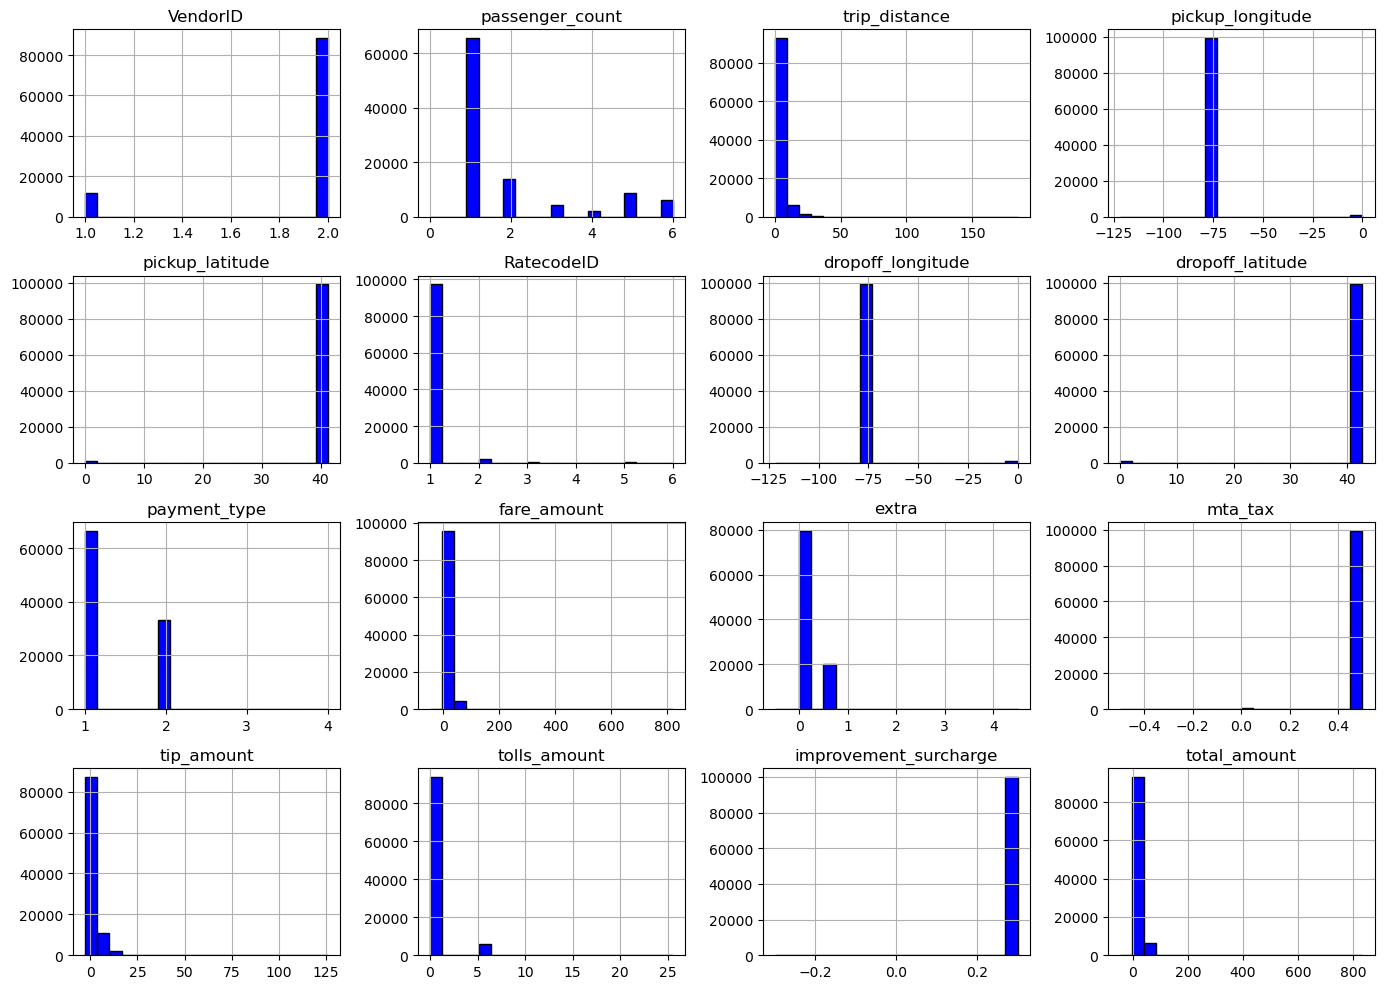

In [25]:
# Exploring the data distribution of numerical columns
plt.figure(figsize=(12 , 6))
df.hist(bins = 20 , figsize = (14 , 10) , color = 'blue' , edgecolor = 'black')
plt.tight_layout()
plt.show()

In [28]:
# Visualize correlations between numerical variables using a heatmap 
plt.figure(figsize=(12 , 8))
sns.heatmap(df.corr() , annot= True , cmap = 'coolwarm' , linewidths = 0.5)
plt.title('correlation heatmap')
plt.show()

ValueError: could not convert string to float: '2016-03-01 00:00:00'

<Figure size 1200x800 with 0 Axes>